<h1 style="text-align: center; font-size: 35px;">End to end supervised learning regression problem</h1>
<hr>
<br>

<p> Welcome to the end to end supervised learning regression problem class! In this notebook, we shall go through all the steps of a rather classic regression problem. The objective is to predict the sales of shops. To do this, we dispose of data from these shops (in the form of a table). Each row of our data represents a day in which the data was collected and contains the following information: </p>
<ul>
    <li> Shop_ID : shop's unique identifier. Used to know which shop we are talking about. 
    <li> Day_of_the_week : encoded from <b>0</b> to <b>6</b>.
    <li> Date : day, month and year of the data point.
    <li> Number of customers : quantity of customers that showed up that day.
    <li> Open : binary variable equal to <b>0</b> if shop closed that day and <b>1</b> if shop was open.
    <li> Promotion : binary variable equal to <b>0</b> if shop had no promotions that day and <b>1</b> if it did.
    <li> State_holiday : encoded from <b>0</b> to <b>4</b> indicating if there was a state holiday at all (<b>0</b> if not), and otherwise, the number indicates which state holiday it was.
    <li> School_holiday : Binary variable equal to <b>0</b> if there was a school holiday that day and <b>1</b> if not.
</ul>
<p> For each row, we also have the sales that the shop made on that day. We need this information in order to understand what is the relationsip between the data from the shops and the sales. Our objective today is to create a machine learning algorithm that receives information about a shop at a given day, and outputs a predicted value for the sales of the shop on that day (see Figure 1) </p>

<img src="img/objective.png" alt="Oops, cant find file. Make sure you have an img directory with the images" style="width: 600px;"/>
<figcaption style="text-align: center">
Fig.1 - Today's objective</figcaption>


<h2> 1. Theoretical and conceptual introduction </h2>

<p>This notebook will attempt to not be very theoretical and shall be more focused on the practical aspects of the problem at hand. Nevertheless, some mathematical notation is included to introduce some key concepts of the algorithms used.</p>


<h3> 1.1 Objective and supervised learning </h3>

<p> This notebook leads with a specific type of problem in machine learning called supervised learning. In supervised learning problems, data is available to us beforehand. Each row of our data is called an observation. Our objective in supervised learning involves training an algorithm, using this data, that receives as an input an observation and outputs a prediction. In the case of this notebook, our input is shop information on a given day and our output prediction is sales. </p>

<!-- 
Nevertheless, supervised learning can be applied to other issues, for example:</p>
<ul>
    <li> Given a student's past academic history, what grade is he expected to get on a given test.
    <li> Given that a patient has a tumor with a certain size, age etc, how likey is the tumor malignant. 
</ul>
In all these examples, we must have data, observations, and a variable to predict. The data is fed into an algorithm which learns from this data, and attempts to make predictions on future observations. 
-->


<h3> 1.2 Notation </h3> 
<p> To formalize our objective, we define: </p>
<ul>
    <li> $X$, the input vectors or input observations. Each element $x_n \in X$ represents an observation of the variables described above.
    <li> $Y$, the output sales. Each $y_n \in Y$ represents the sales observed with input $x_n$. 
</ul>
<p>The observations $x_n$, and the corresponding measured output $y_n$, are called our training data. This is because this is data that will be used to train our prediction algorithm.</p>

<p>Generally speaking, the algorithm we want to compute is a function, $f$ such that for a given input $x$ (not necessarily in our training data), $f(x) = \hat{y}$. Here $\hat{y}$ represents our prediction of $y$ given the observation $x$. In our case, $y$ represents the sales of the shop given the data $x$ from that day.</p>

<h3> 1.3 The concept of regression </h3>

<p>In this notebook we shall deal with a regression supervised learning problem. This is becaus the variable $y$ is a continous variable, sales. If the variable $y$ were a categorical variable (rain or no rain, win or loose), the problem would be a classification supervised learning problem. Regression problems correspond to finding the "curve of best fit" in our data. The image below is a 2D example of this. </p>

<img src="img/linear_reg_init2.png" alt="Drawing" style="width: 500px;"/>
<figcaption style="text-align: center">
Fig.2 - 2D example of linear regression. Source: <a href="https://mlfromscratch.com/machine-learning-introduction-8-linear-regression-and-logistic-regression/#/">here</a></figcaption>

<p>The image above shows a possible solution for a regression problem where a linear curve was used to fit the data. In this case, the vector $x_n$ only has one dimension (observation has only one variable). Each observation is a point. Here, the function $f(x)=\hat{y}$ is the equation of the straight line. </p> 


<h3> 1.4 How to train the model? </h3>

<p> To make sure $f$ is a good predictor we want to minimize the square of error made in each prediction: $(y-\hat{y})^2$. In the case of our example, $y$ would be the real sales that were made on a day where $x$ was observed, and $\hat{y}$ would be our prediction of the sales. We are therefore going to tune the parameters of $f$ so that it gives us the best predictions.</p>

<p>Ok so we want to make a predictor that minimizes the prediction error, got it. How does this work in a practical example. Take for example the linear curve seen in the figure 2. The parmeters of the curve are the gradient and the y-intercept. These are determined by minimizing the following function: </p>

$$ \frac{1}{k}\sum_{n=1}^{k} (y_n-\hat{y}_n)^2 $$

<p>Where $k$ is the total number of points (or rows) in our dataset. Geometrically, this involves minimizing the mean distance of each point to the curve. We therefore choose the straight line that mostly closely fits to the points we have available. </p>

<h3> 1.5 Over and under fitting problem </h3>

In the above example we used a straight line, but we could have used other curve to fit the data. This introduces one of the most important concepts in machine learning, the over and under fitting trade off. In general, the more complex the function $f$, the better the curve fits the points. This is what is shown in figure 3 where, in the overfitting case, we have the smallest error in the training dataset (the training data set are the points we have: the blue points). Remember, the error is smallest because the points are very close to the curve.

<img src="img/over_vs_under4.png" alt="Drawing" style="width: 700px;"/>
<figcaption style="text-align: center">
Fig.3 - Over fitting vs underfitting. Source: <a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html">here</a></figcaption>

<p>The problem is that if in another day, we want to predict a point that we did not originally have in our training data set, our very complex function (over fitted) is going to be extremely biased to the data that we had. It's prediction is therefore going to be very bad. In regression, and in machine learning in general, one must find a balance between model complexity and error obtained to get the best possible model. This is what is seen in the curve in the middle. This curve seems to respect the dynamics of the data, eventhough it has a larger error in the training phase than the curve on the right. </p>

<img src="img/trade_off2.png" alt="Drawing" style="width: 400px;"/>
<figcaption style="text-align: center">
Fig.4 - Over and underfitting trade off. Source: <a href="http://www.ds100.org/sp17/assets/notebooks/linear_regression/Feature_Engineering_Part2.html">here</a></figcaption>

<p>Figure 4 above illustrates this point. The vertical axis represents the error and the horizontal axis represents the complexity of the model. The training error curve is the error obtained in the training data set (the data set that we have available in the beggining). We verify the discussion above where, as we increase the model complexity, the training error tends to zero. The testing error curve is the curve obtained in the general case, where the predictions of new observations, with which the model was not trained with, are done. We see that there is an optimal point where the testing error is minimal. This is the point we look for.</p>



<h2> 2. Setup </h2>

<h3> 2.1 Importing data set </h3>

<p> Enough theory, let’s get into the problem! We shall now begin by importing our data set in the format of a pandas data frame. Make sure you have a folder in the same directory as this notebook called data. The csv data files should be inside this folder.</p>


In [2]:
############################################################################### 
###########################     IMPORT DATA SET     ########################### 
############################################################################### 

# Library used to manipulate data
import pandas as pd

# Names of the columns of the data set
columns=[
    'Store_ID', 
    'Day_of_the_week', 
    'Date', 
    'Nb_customers', 
    'Open', 
    'Promotion', 
    'State_holiday', 
    'School_holiday']

# import the data set
df_train = pd.read_csv('data/clean_store_train.csv', sep=' ', names=columns) # This is the X
df_label = pd.read_csv('data/store_train_solution.csv', sep=' ', names=['Sales']) # This is the Y

df_train.head()

,Store_ID,Day_of_the_week,Date,Nb_customers,Open,Promotion,State_holiday,School_holiday
0,625,3,2013-11-06,641,1,1,0,0
1,293,2,2013-07-16,877,1,1,0,1
2,39,4,2014-01-23,561,1,1,0,0
3,676,4,2013-09-26,1584,1,1,0,0
4,709,3,2014-01-22,1477,1,1,0,0


In [4]:
df_label.head()

,Sales
0,7293
1,7060
2,4565
3,6380
4,11647


<h3> 2.2 Processing data </h3>

<p> Many times, we need to do some processing on the data in order to feed it to our algorithms. In particular, categorical type data needs to be converted or encoded into numerical data, in order for the algorithm to be able to interpret the data. In our case, we are going to convert the date column into three different columns. One column will contain the day, another the month and the third the year.</p>

In [5]:
# Check what data types we have
print('The data types we have on our dataset are:', df_train.dtypes.unique())


The data types we have on our dataset are: [dtype('int64') dtype('O')]


In [6]:
# Lets see which data is categorical
df_train.select_dtypes('O').head()


,Date
0,2013-11-06
1,2013-07-16
2,2014-01-23
3,2013-09-26
4,2014-01-22


In [7]:
# Lets convert the dates into three numerical columns. We will use the function below for that.
def get_numeric_dates(df):
    """
    This function receives a data frame and converts it's data column 
    into three distinct columns. The function then returns these three 
    columns as data frames. 
    """
    dates = df["Date"]

    day_list   = []
    month_list = []
    year_list  = []
    
    for s in dates:
        year,month,day = s.split('-')
        year_list.append(int(year))
        month_list.append(int(month))
        day_list.append(int(day))

    # Create panda dataframes
    day_list   = pd.DataFrame(day_list, columns=['Day'])
    month_list = pd.DataFrame(month_list, columns=['Month'])
    year_list  = pd.DataFrame(year_list, columns=['Year'])
    
    return year_list, month_list, day_list

In [9]:
# Get new data columns by calling the function above
df_year, df_month, df_day = get_numeric_dates(df_train)

# Check to see if we have got the year well
df_month.head()

,Month
0,11
1,7
2,1
3,9
4,1


In [11]:
# Lets drop the current data column (we dont need it anymore)
df_train = df_train.select_dtypes(['int64'])
df_train.head()

,Store_ID,Day_of_the_week,Nb_customers,Open,Promotion,State_holiday,School_holiday
0,625,3,641,1,1,0,0
1,293,2,877,1,1,0,1
2,39,4,561,1,1,0,0
3,676,4,1584,1,1,0,0
4,709,3,1477,1,1,0,0


In [12]:
# Lets add the new df's we have just created containing the dates. 
df_train_full = pd.concat([df_train, df_day, df_month, df_year], axis=1, sort=False)
df_train_full.head()

,Store_ID,Day_of_the_week,Nb_customers,Open,Promotion,State_holiday,School_holiday,Day,Month,Year
0,625,3,641,1,1,0,0,6,11,2013
1,293,2,877,1,1,0,1,16,7,2013
2,39,4,561,1,1,0,0,23,1,2014
3,676,4,1584,1,1,0,0,26,9,2013
4,709,3,1477,1,1,0,0,22,1,2014


<p> Great! Our data is ready for analysis, all columns are now numeric.</p>

<h2> 3. Unidminesional analysis </h2>

<p> The first step of the analysis is the study of the variables one by one. This can help us understand a number of things: 
<ul>
    <li> If any variables have points that are anomalies
    <li> What are the distributions of each variable.
    <li> Is the data well distributed, i.e, is there more data about particular shops or particular periods of time. 
</ul>
</p>


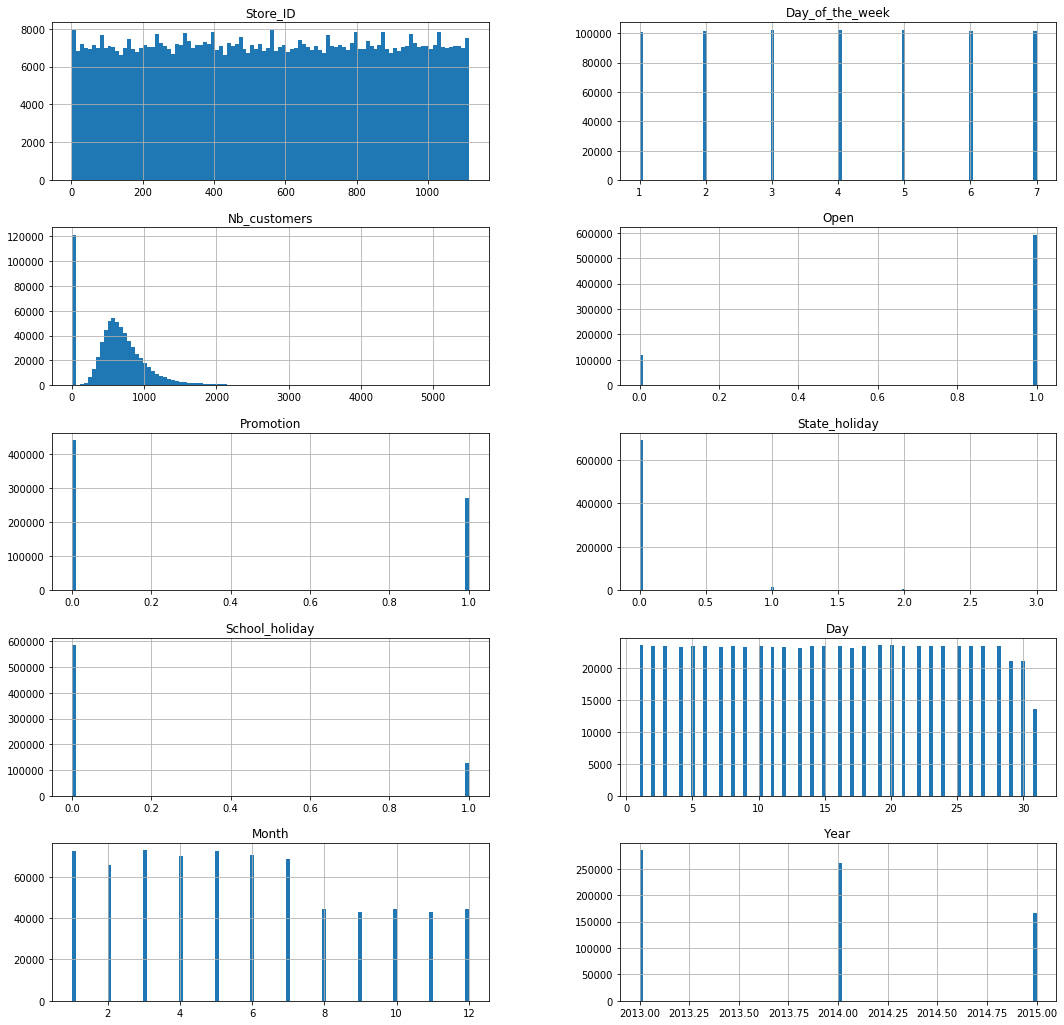

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# We will begin with some histogrammes of the variables one by one
fig, axes = plt.subplots(nrows=len(df_train_full.columns)//2, ncols=2, figsize=(18,18))

i = 0
for line_axes in axes:
    for axis in line_axes:
        df_train_full.hist(column=df_train_full.columns[i], bins=100, ax=axis)
        i += 1
plt.show()

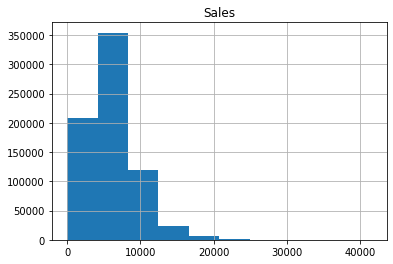

In [14]:
# Look at the sales
df_label.hist(column='Sales')
plt.show()

<h2> 4. Multidminesional analysis </h2>

<p> Let us now study how these variables relate to each other and most importantly, how they relate to the sales. The type of relation we shall test for is linear correlation. The correlation coefficient that measures this is known as Pearson's correlation coefficient.</p>

$$
    \rho = \frac{\sum^{n}_{i=1} (x_i - \bar{x})(y - \bar{y})}{\sqrt{\sum^{n}_{i=1} (x_i - \bar{x})^2} \sqrt{\sum^{n}_{i=1} (y - \bar{y})^2}}
$$

<p>If this equation looks complicated to you, don’t worry. It simply measures how much does one of the variables vary when the other varies. </p>


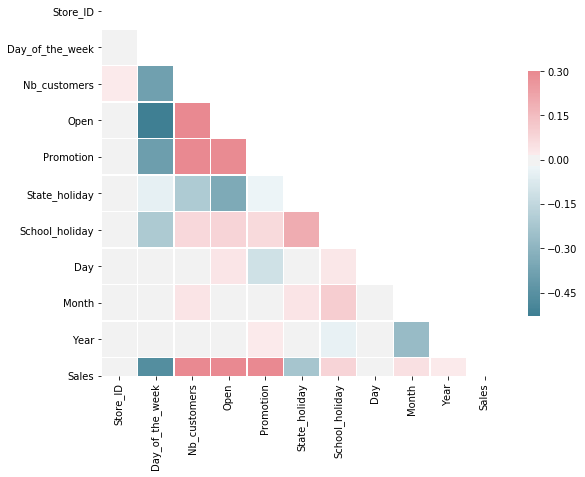

In [15]:
# We shall begin with the correlation matrix
import seaborn as sns
import numpy as np

new = pd.concat([df_train_full, df_label], sort=False, axis=1)
corr = new.corr() # default = pearson. Option : spearman

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<p> We can already see some things that are interesting:
<ul>
    <li> The sales are positively correlated with the number of customers.
    <li> The sales seem to be negatively correlated to the week day. This means that the shops sell more in the beginning of the week. 
</ul>
</p>

<p> We just saw in the graph above that some variables are more correlated than other in terms of the Pearson correlation coefficient. However, this can be misleading. If for example, the number of customers had an exponential relation to the number of sales, even though this is a very strong correlation, the Pearson correlation will still be quite weak. This is because the exponential behavior is not captured by the Pearson coefficient who measures linear behavior.</p>

<p> To solve this we can do a series of things. We can change the correlation coefficient we use. We could use Spearson’s correlation coefficient for example which is a measure of the monotonic relationship between variables (when one increases, does the other also increase regardless of how it increases?).</p>

<p> For the purpose of this notebook, we shall demonstrate this idea in a more visual manner through the next figure. </p>

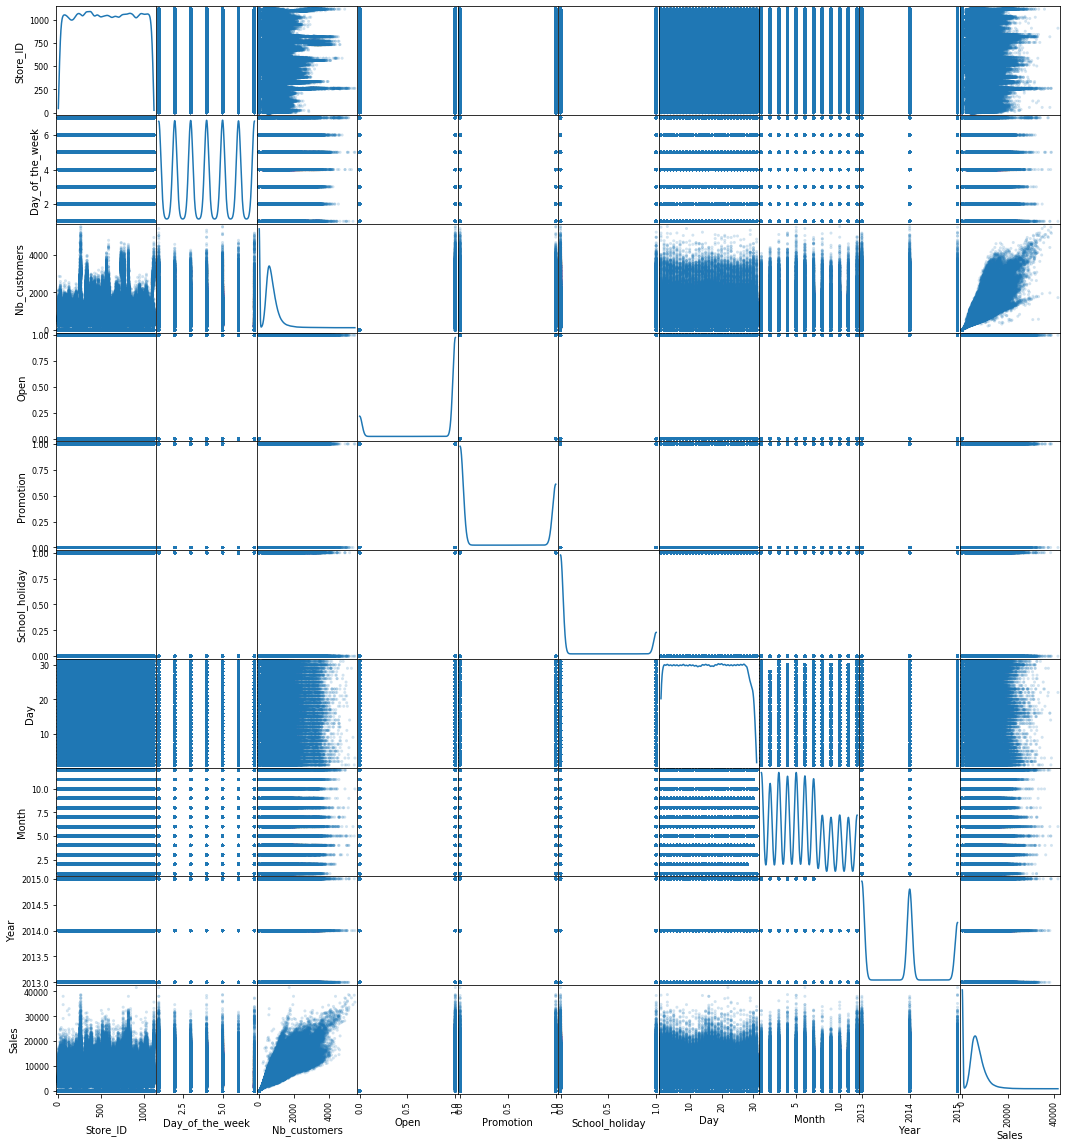

2788.741094827652


In [25]:
from pandas.plotting import scatter_matrix
import time

# Scatter plot
start = time.time()
scatter_matrix(new[
    ["Store_ID","Day_of_the_week", "Nb_customers", "Open", "Promotion", "School_holiday","Day", "Month", "Year","Sales"]
], alpha=0.2, figsize=(18, 21), diagonal='kde')
plt.show(),
elapsed = time.time() - start
print("Time taken to run:", elapsed)


<h2> 5. Supervised learning models</h2>

<p> Finally, we can start applying some models. We are going to apply 2 methods in this project:</p>
<ul>
    <li> Linear method.
    <li> Tree based method called random forest.
</ul>
<p>I chose these two for the following reasons. The linear model is probably the most classic and simple regression model used. It is important to start and should be implemented at least once to understand how it works. The second model was chosen as tree based models normally provide good results and are able to capture a large variety of non-linear patterns. </p>

<p> You can ignore the code below. It just contains some functions to help us make the predictions.</p>


In [16]:
#######################################################################
######################    HELPER FUNCTIONS      ####################### 
#######################################################################
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

def clean_prediction(prev, data):
    """
    Cleaning prediction. Here, if any predictions are negative we force them to zero. If store was closed, we 
    force the sales to be zero. 
    """
    # Cleaning prediction
    #Sales can't be negative
    for i in range(len(prev)):
        if prev[i] < 0:
            prev[i] = 0
    
    # Sales are equal to zero if shop was closed
    list_open_test_data = list(data["Open"])
    index_closed_test_data =  np.where(np.isin(list_open_test_data,0))
    index_closed_test_data = np.array(index_closed_test_data).flatten()

    prev[index_closed_test_data] = 0
    
    return prev

def display_train_test_results(model):
    """
    Display the training and the testing results. 
    """
    # Predict data using the model that was passed with the same data it as trained with.
    prev_train = model.predict(X)
    
    # Clean prediction
    prev_train = clean_prediction(prev_train, X)

    print("Errors in training")
    #print("MSE =", mean_squared_error(Y, prev_train))
    print("RMSE =", sqrt(mean_squared_error(Y, prev_train)))
    print("R2 =", r2_score(Y, prev_train))
    
    # Predict data using the model that was passed with the testing data.
    prev_test = model.predict(X_test)

    # Clean prediction
    prev_test = clean_prediction(prev_test, X_test)

    print("\nErrors in testing")
    #print("MSE =", mean_squared_error(Y_test, prev_test))
    print("RMSE =", sqrt(mean_squared_error(Y_test, prev_test)))
    print("R2 =", r2_score(Y_test, prev_test))

<p> To test our models and see how good they really are, we need to have some test data. This will be data that the model has never seen (data not used during the training stage). To do this, we are simply going to get all our data, and split it into a training data set (X,Y) and a test dataset (X_test, Y_test).</p>

In [17]:
#######################################################################
#############    SPLIT DATA FOR MODELING AND TESTING      ############# 
#######################################################################
from sklearn.model_selection import train_test_split

# Split data in train and test datasets 
# df_train_label_sqrt or  df_train_label_all
X, X_test, Y, Y_test = train_test_split(df_train_full, 
                                        df_label, 
                                        random_state=0, 
                                        test_size = 0.25)

# Print the sizes to see if the division
print("Training data set size:",X_test.shape[0])
print("Testing data set size:",X.shape[0])

Training data set size: 178012
Testing data set size: 534033


<h3> 5.1 Linear model </h3>

<p> We shall start with the linear model. The estimator in this case is rather simple. In the case where we have $p$ variables (number of columns in the data set), the linear model prediction function, $f(x)$, is written as follows: </p>
$$
f(x) = \beta_0 + \sum_{i=1}^{p} \beta_i x_i
$$
<p>This simply says that the function that predicts the sales, is a linear combination of the input variables, $x_i$'s. The weight of importance that we associate to each variable is given by the $\beta$ coefficient. A high value for $\beta_i$ means that the variable $i$ has an important influence in the sales. In our example, the model might give a large value for the $\beta$ coefficient related to the number of customers. This is because we know that the more customers there are, the more sales we are expected to get.  A 2D example of this type of model is shown in the figure below which you have already seen. </p>

<img src="img/linear_reg_init2.png" alt="Drawing" style="width: 500px;"/>



In [18]:
#######################################################################
#######################    LINEAR REGRESSION    #######################
#######################################################################
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X, Y)

# Display training and testing results
display_train_test_results(reg)

Errors in training
RMSE = 1465.2133555609203
R2 = 0.855410570223326

Errors in testing
RMSE = 1455.2339289846927
R2 = 0.8567706438385532


<h3> 5.2 Tree based model </h3>

<h4> 5.2.1 Introduction - A binary tree </h4>

<p> A binary tree is a seperation of data into two parts. These two parts are called the leafs of the binary tree. The figure below shows an example of such a division.</p>

<img src="img/binary3.png" alt="Drawing" style="width: 400px;"/>


<p> Imagine a data set containing information about companies. Consider that one of the variables is the monthly revenue of the companies. We can divide the data into two groups by choosing a revenue value, say $10000$, and splitting the data into one group with companies with a monthly revenue smaller than $10000$, and another group with the monthly revenue greater than or equal to $10000$. What we are left with, is a binary tree. </p>

<h4> 5.2.2 A decision tree </h4>

<p> A decision tree is what we saw in the introduction. Indeed, after the binary tree, nothing stops us from making the tree deeper. All we neeed to do is make more divisions in each group of the data set (creating two groups per division). The figure below shows an example of this deeper tree using two $x$ variables ($y$ variable to predict not shown). </p>

<img src="img/binary2.png" alt="Drawing" style="width: 500px;"/>
<figcaption style="text-align: center">
Fig.5 - Binary tree example. Source: <a href="http://wikistat.fr/">here</a></figcaption>






<h4> 5.2.3 Decision tree in regression </h4>

<p>We will now look at a type of model based on binary trees. A tree based model consists in dividing the data into groups. Each data point in each group has a value for $y$, the variable we want to predict. For each group, we take the average value of $y$. If we want to predict the value of $y$ for a future data point, we simply see in which group it falls and then predict the $y$ value to be the average $y$ value from the group it fell into. In our case, we use a regression decision tree. As always, a 2D example is shown in figure 4.</p>

<img src="img/dec_tree_simple.png" alt="Drawing" style="width: 500px;"/>
<figcaption style="text-align: center">
Fig.5 - 2D example for a regression decision tree. Source: <a href="https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html">here</a></figcaption>

<p>The figure shows a slightly underfitting decision tree. We are dividing the data, $x$, into groups (4 in this case). As described above, these groups are defined by the avergae $y$ value of the points in that group. These average $y$ values are the orange straight lines you see in the figure. If we wanted to predict the value of $y$ of a new point with, say $x=2$, then we would see that it belongs to the group with the long line and would therefore predict a value of $\hat{y}=0.75$.</p>

<p>So what are the advanatges of this method: </p>
<ul>
    <li> Tree based algorithms are relatively simple to understand and can be visualised.
    <li> Does not require a lot of data preperation (other than removing missing values). 
</ul>
Some disadvantages:
<ul>
    <li> Decision-trees can create over-complex trees and therefore over-fitting to the data. 
    <li> Decision trees are unstable, small variation in the data points can lead to large variations in the model. 
</ul>
We will then describe in more detail how decision trees are formed and the go on to explain how they are used in an algorithm called random forest.


<h4> 5.2.4 How does the over and under fitting tradeoff work here? </h4>

<p> No we are left with the question, how many divisions do we make? Also, how deep do we make the tree? Lets go back to the 2D example of the introduction:</p>

<img src="img/trade_off_trees.png" alt="Drawing" style="width: 800px;"/>
<figcaption style="text-align: center">
Fig.6 - Decision tree example. Source: <a href="http://wikistat.fr/">here</a></figcaption>

<p>We have the same data but now trying out trees with different depths. Remember, the depth of a tree is not equal to the number of groups but puts a limit on the number of groups we can have. Notice that the decision tree in the far right is clearly overfitted. The noisy points which drift away from the general form of the curve we want to predict have lead the tree to create a very unstbable and overfitted model.</p>


<h4> 5.2.5 How do we make divisions? </h4>

<p> The next question to ask ourselfs is: what criteria should I choose to make a division? Well, the answer involves a little bit of mathematics. Nevertheless, simply put, we will choose the division that offers us the best division of the data. This means that for each group created, the points inside each of of these groups, will be as similar to each other as possible. Mathematically, this is done by minimising the following function:</p>

$$ 
    \frac{|\kappa_L|}{n} \sum_{i \in \kappa_L}(y_i - \overline{y}_{\kappa_L}) +  \frac{|\kappa_R|}{n} \sum_{i \in \kappa_R}(y_i - \overline{y}_{\kappa_R})
$$
<p> Where:
<ul>
    <li> $\kappa_L$ is the number of points in the left group.
    <li> $\kappa_R$ is the number of points in the right group.
    <li> $n$ is the total number of points.
    <li> $y$ is, like in the introduction, the value of the variable we want to predict. 
</ul>
</p>

In [19]:
#######################################################################
#########################    DECISION TREE    #########################
#######################################################################
from sklearn.tree import DecisionTreeRegressor

# Initialise the decision tree model with:
#     - A maximum of 8 layers
RFregressor = DecisionTreeRegressor(max_depth=8)

# Fit the data to the model (train)
print("Training...")
RFregressor.fit(X, Y)

# Display train and test results
display_train_test_results(RFregressor)

Training...
Errors in training
RMSE = 1339.4432168896078
R2 = 0.8791675942739531

Errors in testing
RMSE = 1337.3962532889132
R2 = 0.8790275098440994


<h2> 6. Random Forest algorithm </h2>

<p> Random forest operates by constructing a multitude of decision trees at training time and then using those trees to make the predictions. Each decision tree is constructed with only a fraction of the total data. The prediction chosen is the mean prediction of the trees. This helps us reduce the overfitting problem associated to individual decision trees. Figure 7 below shows an example where we are trying to predict the value of a variable that is either $1$ or $0$. We would choose $1$, as that is greatest voted value of all trees.</p>

<img src="img/RandomForest.png" alt="Drawing" style="width: 400px;"/>
<figcaption style="text-align: center">
Fig.7 - Decision tree example. Source: <a href="/">here</a></figcaption>

In [21]:
#######################################################################
####################    RANDOM FOREST REGRESSION    ###################
#######################################################################
from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset
# Initialise the forest model with:
#     - 50 decision trees.
#     - Each tree can have at most 8 layers.
RFregressor = RandomForestRegressor(n_estimators = 300, max_depth = 7)
print("Training...")
RFregressor.fit(X, Y)

# Display train and test results
display_train_test_results(RFregressor)

Training...


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Errors in training
RMSE = 1337.9207711864954
R2 = 0.8794421206253422

Errors in testing
RMSE = 1331.884637330807
R2 = 0.8800225477886473


<h2> 7. Training the model in the cloud </h2>

<p> The last algorithm we used has a lot of parameters to define. There is no golden formula to know which parameters are optimal for our project. This depends highly on the nature of the data set. Nevertheless, we can do something called a cross validation grid search. This essentially involves testing many combinations of model parameters and choosing the combination that gives the best results. </p>

<p>The problem with this is that it takes a long time to test all these different combinations because it requires a large amount of computational capacity. Due to this, many times, our laptops are not powerfull enough to do these calculation in a reasonable amount of time. It is for this reason that we shall do our calculations on the cloud.</p>

<p> To train your model in the cloud follow these steps:</p>
<ul>
    <li> Create an account on google cloud platform (GCP)
    <li> Login to your GCP and select the <b>Console</b> on the top right hand side of the screen. You should be redirected towards your dashboard and in a default project called <b>my_project</b>.
    <li> Open your navigation menu (the menu on the top left hand side of the screen.)
    <li> Scoll down until you find <b>AI-training platform</b>. Select the <b>Notebooks</b> option.
    <li> In the plus symbol, select the <b>Python</b> option:
        <ul>
            <li> In the menu that pops up, select the personalize option.
            <li> Name the notebook <b>ml_intro</b>.
            <li> Choose the region that is geographically closest to you. Im in Portugal, so I will choose the <b>europe-west</b> region. 
            <li> In machine configuration choose the <b>n1-standard-8</b> option. 
            <li> Click create
        </ul>
    <li> Now for the notebook instance to initialise. Once it has initilised, a blue option chould appear <b>Open in Jupyter</b>, click it.
    <li> Select a <b>Python3</b> instance. 
    <li> You are now inside a notebook running on the cloud!
    <li> Use the upload sybol in the top left to uplaod your data to the notebook environment.
    <li> You are ready to go! Copy and paste the code from this lab and run it.
</ul>


<h2> 8. On to you </h2>

<p> Now it is your turn to experiment. Search the scikit learn library for other models, test them and see if you can beat the score got. Use the link below to choose your models and get started: </p>

<a> https://scikit-learn.org/stable/supervised_learning.html#supervised-learning </a>

<p> Once you have chosen your model, use you GCP account to optimized the model and obtain the best score possible! </p>